***2. In this question, you will use the Iris data set (“from sklearn.datasets import load_iris”). ***

In [156]:
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
print(iris.feature_names)
#print(iris.data[0:1])
print(iris.target)
#print(iris.data.shape)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


***a. Use a confusion matrix to evaluate the use of logistic regression to classify the iris data set.***

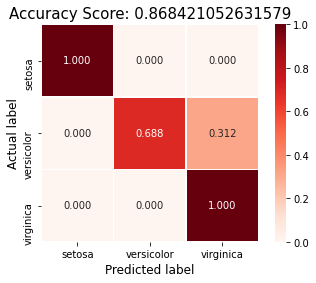

In [126]:
#LOGISTIC REGRESSION

# Divide the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)
class_names = iris.target_names


# create and train our model
logistic_reg = LogisticRegression(multi_class='ovr', solver='liblinear')
logistic_reg.fit(x_train, y_train)

# From new data it will predict the label/name 
logistic_reg.predict(x_test[0].reshape(1,-1))

# Predict for Multiple Observations at once / on all test data (array x_test) 
predictions = logistic_reg.predict(x_test)
#print(x_test)

# Use the score method to get the accuracy of model
score = logistic_reg.score(x_test, y_test)
#print(score)



#NORMALIZED CONFUSION MATRIX

#plotting a confusion matrix, a table that describes the performance of a classifier on a set of test data for which the true values are known.
confmatr = metrics.confusion_matrix(y_test, predictions, normalize='true')

ax1 = plt.subplot()

sns.heatmap(confmatr, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds')
ax1.set_xticklabels(class_names)
ax1.set_yticklabels(class_names)
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)
plt.ylabel('Actual label',size=12)
plt.xlabel('Predicted label',size=12)
#plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show(); 

We can see that some tests intendend to be Versicolor but were misclassified as Virginica (seen as middle right square 0.312).


***b. Use k-nearest neighbours to classify the iris data set with some different values for k, and with uniform and distance-based weights. What will happen when k grows larger for the different cases? Why?***


Text(0, 0.5, 'accuracy')

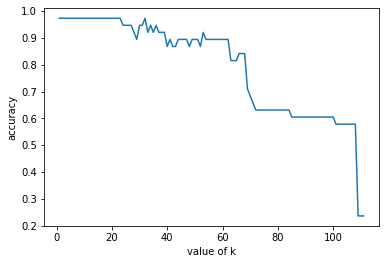

In [192]:
#k = 112 #k=1,3,21

k = list(range(1, 112))
accuracy = []

for i in k:
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=i) 
    #Train the model using the training sets
    knn.fit(x_train, y_train)

    #Predict the response for test dataset
    y_pred = knn.predict(x_test)

    # Model Accuracy, how often is the classifier correct?
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    #print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#print(accuracy)

plt.plot(k,accuracy)
plt.xlabel('value of k')
plt.ylabel('accuracy')

#knn.predict(iris.data[10:11])
#iris.target[10:11]

***c. Compare the classification models for the iris data set that are generated by k-nearest neighbours (for the different settings from question 3) and by logistic regression. Calculate confusion matrices for these models and discuss the performance of the various models.***

In [ ]:
# Start writing code here...